In [3]:
import pandas as pd
import numpy as np
data = pd.read_excel(r"C:\Users\Peter's 2nd Laptop\Documents\MATLAB\FB again\Matlab Code No Contraints\testdata.xlsx")
number_rams=4
print(data)

    radial position        Fx       Fy
0          0.000000  1241.850 -228.450
1        205.128205  1230.165 -230.970
2        615.384615  1227.285 -224.010
3       1025.641026  1215.285 -215.760
4       1435.897436  1194.600 -206.355
5       1846.153846  1165.680 -195.930
6       2256.410256  1128.990 -184.605
7       2666.666667  1084.965 -172.515
8       3076.923077  1034.055 -159.795
9       3487.179487   976.695 -146.565
10      3897.435897   913.350 -132.945
11      4307.692308   844.470 -119.085
12      4717.948718   770.505 -105.105
13      5128.205128   691.875  -91.140
14      5538.461538   609.060  -77.310
15      5948.717949   522.495  -63.765
16      6358.974359   432.630  -50.610
17      6769.230769   339.915  -37.980
18      7179.487179   244.800  -26.010
19      7589.743590   147.720  -14.835
20      8000.000000    49.125   -4.575


In [10]:
from numpy import interp

nodes=100
radpos=data['radial position']
Fxin=data['Fx']
Fyin=data['Fy']

dps=len(data)-1
L=data['radial position'][dps]

x=list(range(0,nodes))
b=L/(nodes-1)
x[:] = [ __ * b for __ in x]

Fx=interp(x,radpos,Fxin)
Fy=interp(x,radpos,Fyin)

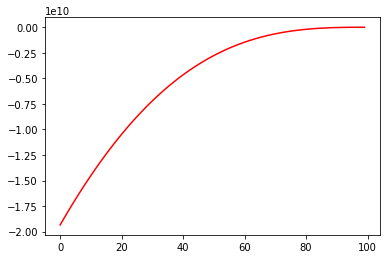

In [45]:
import scipy 
import numpy
from scipy import integrate
from numpy import append
from numpy import trapz
from numpy import insert
import matplotlib.pyplot as plt
%matplotlib inline  

integralpart=scipy.integrate.cumtrapz(Fx, x)
integralpart=numpy.insert(integralpart,0,0)
TF=integralpart[-1]

TargetShear=[None]*len(Fx)
TargetShear[0]=TF
TargetShear[-1]=0


for k in range(2,len(integralpart)):
    TargetShear[k-1]=TF-integralpart[k-1]
    

integralPart=scipy.integrate.cumtrapz(TargetShear,x)
integralPart=numpy.insert(integralPart,0,0)
bmax=integralPart[-1]

TargetBending=[None]*len(Fx)
TargetBending[0]=bmax-integralPart[0]
TargetBending[-1]=0

for k in range(2,len(integralPart)):
    TargetBending[k-1]=bmax-integralPart[k-1]
    TargetBending[k-2]=-TargetBending[k-2]

plt.plot(TargetBending,'r')


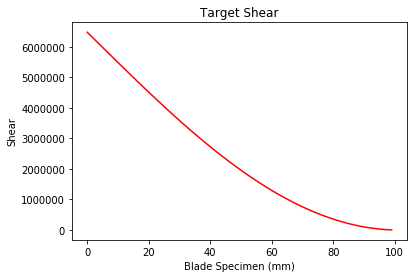

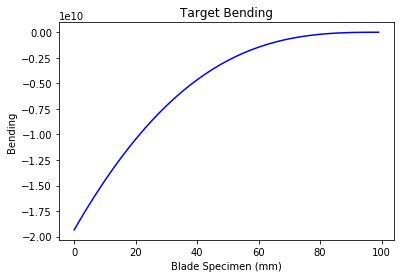

[-1.93467041e+10 -1.88268887e+10 -1.83151524e+10 -1.78114683e+10
 -1.73158190e+10 -1.68281971e+10 -1.63485991e+10 -1.58770211e+10
 -1.54134584e+10 -1.49579020e+10 -1.45103384e+10 -1.40707521e+10
 -1.36391276e+10 -1.32154488e+10 -1.27996955e+10 -1.23918432e+10
 -1.19918652e+10 -1.15997350e+10 -1.12154254e+10 -1.08389057e+10
 -1.04701410e+10 -1.01090939e+10 -9.75572740e+09 -9.41000378e+09
 -9.07188260e+09 -8.74131881e+09 -8.41826520e+09 -8.10267458e+09
 -7.79449959e+09 -7.49369031e+09 -7.20019229e+09 -6.91394891e+09
 -6.63490355e+09 -6.36299957e+09 -6.09817814e+09 -5.84037599e+09
 -5.58952764e+09 -5.34556761e+09 -5.10843043e+09 -4.87804869e+09
 -4.65435101e+09 -4.43726378e+09 -4.22671322e+09 -4.02262555e+09
 -3.82492537e+09 -3.63353371e+09 -3.44836941e+09 -3.26935098e+09
 -3.09639696e+09 -2.92942450e+09 -2.76834760e+09 -2.61307808e+09
 -2.46352736e+09 -2.31960683e+09 -2.18122678e+09 -2.04829470e+09
 -1.92071597e+09 -1.79839545e+09 -1.68123801e+09 -1.56914760e+09
 -1.46202573e+09 -1.35977

In [23]:
import scipy 
import numpy
from scipy import integrate
from numpy import append
from numpy import trapz
from numpy import insert
import matplotlib.pyplot as plt
%matplotlib inline  

integralpart=scipy.integrate.cumtrapz(Fx, x)
integralpart=numpy.insert(integralpart,0,0)
TF=integralpart[-1]

TargetShear=TF-integralpart[0]

for k in range(2,len(integralpart)):
    TargetShear=np.append(TargetShear,TF-integralpart[k-1])
TargetShear=np.append(TargetShear,0)


integralPart=scipy.integrate.cumtrapz(TargetShear,x)
integralPart=numpy.insert(integralPart,0,0)
bmax=integralPart[-1]

TargetBending=bmax-integralPart[0]

for k in range(2,len(integralPart)):
    TargetBending=np.append(TargetBending,bmax-integralPart[k-1])
TargetBending=np.append(TargetBending,0)
TargetBending=TargetBending*-1


plt.plot(TargetShear,'r')
plt.xlabel('Blade Specimen (mm)')
plt.ylabel('Shear')
plt.title('Target Shear')
plt.show()

plt.plot(TargetBending,'b')
plt.xlabel('Blade Specimen (mm)')
plt.ylabel('Bending')
plt.title('Target Bending')
plt.show()

print(TargetShear[15])

In [5]:
integralpart[0]

0.0